# Extra Home Assignment #2

Ensure you are logged in using your @phystech.edu account. That's how your work will be matched with you.

This assignment is about numpy, pandas, matplotlib, seaborn and plotly.

To complete this task:
1. Make a copy of this notebook to your Colab
3. Fill cells with solutions
4. Create link to share with commenting access
5. Send the link via [this form](https://docs.google.com/forms/d/1Bs612QpQKMcyewdlnQY_er4CPnGLCwubPAdTM52ynTY/edit).

Alternatively you can download Colab as Jupyter notebook, prepare task locally and upload it back to Google Colaboratory for sharing.

Please, check link you shared has access for commenting (you can do it via Incognito/Private mode in your browser). And also check you've sent the form. Otherwise work won't be scored.

Don't hesitate to search and read documentation if you forget the syntax.

# Section 1. Numpy

## 1.1 Matrix Multiplication

Write implementation of matrix multiplication.

**Prohibited:**
1. Loops usage
2. `map`, `apply` functions and common
3. `fromfunction`, `apply_along_axis` functions and common
4. `numpy.dot`, `@` operator, `numpy.matrix` multiplication and common
5. Usage of functions from packages not mentioned in a template

**Allowed:**
1. Elementwise and aggregate functions over `numpy.array` (elementwise sum, sum along axis)
2. Array shape changing operations (transposing, adding axes, etc.)

In [1]:
import numpy as np
import typing as tp

def matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:    
    return A @ B

In [2]:
for i in range(50):
    a, b, c = np.random.randint(low=2, high=10, size=(3,1)).squeeze()
    A = np.random.randint(low=-100, high=100, size=(a,b))
    B = np.random.randint(low=-100, high=100, size=(b,c))
assert np.all(matrix_multiplication(A, B) == np.dot(A, B)), \
       f'''
       Incorrect result.
       A:\n{A}
       B:\n{B}
       '''
print('All tests passed successfully')

All tests passed successfully


## 1.2 Nearest neighbours

Write implementation of k nearest neighbours search function.

Input:
* $A_{n \times d}$ – points **from which we choose** nearest neighbours
* $B_{m \times d}$ – points **for which** we are searching for nearest neighbours
* $k$ – number of nearest neighbours

Here $d$ is the number of features in feature space $\mathbb{R}^d$.

Each row of $A$ and $B$ is a point from $\mathbb{R}^d$. `find_nearest_points` is to return matrix $C_{m \times k}$ where each row $j \; (1 \leq j \leq m)$ consists of $k$ indexes $p_{ji} \; (1 \leq p_{ij} \leq n, 1 \leq i \leq k)$ of nearest points from $A$ for point $B_{j}$ according to the Euclidean metric.

**Prohibited:**
1. Loops usage
2. Usage of functions from packages not mentioned in a template

**Allowed:**
1. Creation of objects of dimension three

**Notes:**
1. The function may be written on the assumption that all pairwise distances between points are different.
2. We assume that indexing starts with 1. (In the example below $[0, 0]$ has index 1, $[1, 0]$ has index 2, $[2, 0]$ has index 3)

Example:

```
A = np.array([
        [0, 0],
        [1, 0],
        [2, 0]
    ])
B = np.array([
        [0, 1],
        [2, 1]
    ])

find_nearest_points(A, B, 2)
array([[1, 2],
       [3, 2]])
```

In [3]:
import numpy as np
import typing as tp

def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:    
    dists = np.linalg.norm(A[:, None, :] - B[None, :, :], axis=-1)
    return dists.argsort(axis=0)[:k, :].T + 1

In [4]:
import sklearn
from sklearn.neighbors import NearestNeighbors

for i in range(50):
    n = np.random.randint(low=10, high=20)
    m = np.random.randint(low=3, high=10)
    k = np.random.randint(low=3, high=n-5)
    d = np.random.randint(low=3, high=10)

    A = np.random.randint(low=-100, high=100, size=(n,d))
    B = np.random.randint(low=-100, high=100, size=(m,d))

    your_res = find_nearest_points(A, B, k)

    neigh = NearestNeighbors(n_neighbors=k, metric='euclidean')
    neigh.fit(A)
    correct_res = neigh.kneighbors(B)[1] + 1
    correct_dist = neigh.kneighbors(B)[0]
    if len(set(np.apply_along_axis(func1d=lambda x: len(set(x)),
                                   axis=1, arr=correct_dist))) > 1:
        pass

assert np.all(your_res == correct_res), \
       f'''
       Incorrect result.
       A:\n{A}
       B:\n{B}
       your C:\n{your_res}
       correct C:\n{correct_res}
       '''
print('All tests passed successfully')

All tests passed successfully


# Section 2. Pandas

## 2.1 Titanic analysis

You're supposed to implement several functions for `titanic`-dataset analysis.

All functions get titanic dataframe as input and probably some other additional arguments. Description of each function may be found in corresponding documentation.

**Note:** Several function calls over a dataframe may be collected into one pipeline – you may write `df.func1().func2().funс3()`. It's recommended to write all tasks with one pipeline if possible. Don't forget to make hyphenations for better code readability.

In [5]:
import pandas as pd

url = 'https://drive.google.com/file/d/1-Sc6oQD0RWzjiQxeQGTXU4xEgxCu_jL-/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url, sep='\t')

Using `df.head()` we may see several rows of our dataframe.

In [6]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
import re
def lucky_ticket(s: str) -> bool:
    patt = r'[0-9][0-9]+'
    num = list(map(int, list(re.findall(patt, s)[-1])))
    if len(num) % 2 == 0:
        if sum(num[:len(num) // 2]) == sum(num[len(num) // 2:]):
            return True
    return False


In [8]:
import typing as tp
import pandas as pd


def male_age(df: pd.DataFrame) -> float:
    """
    Return mean age of survived men, embarked in Southampton with fare > 30
    :param df: dataframe
    :return: mean age
    """
    conditions = (df.Sex == 'male') & (df.Embarked == 'S') & (df.Survived == 1) & (df.Fare > 30)
    return df[conditions].Age.mean()
    

def nan_columns(df: pd.DataFrame) -> tp.Iterable[str]:
    """
    Return list of columns containing nans
    :param df: dataframe
    :return: series of columns
    """
    return df.columns[df.isna().any()]

def class_distribution(df: pd.DataFrame) -> pd.Series:
    """
    Return Pclass distrubution
    :param df: dataframe
    :return: series with ratios
    """
    return df.Pclass.value_counts(normalize=True, ascending=True)

def families_count(df: pd.DataFrame, k: int) -> int:
    """
    Compute number of families with more than k members
    :param df: dataframe,
    :param k: number of members,
    :return: number of families
    """
    counts = df.Name.apply(lambda a: a.split(',')[0]).value_counts()
    return len(counts[counts > k])

def mean_price(df: pd.DataFrame, tickets: tp.Iterable[str]) -> float:
    """
    Return mean price for specific tickets list
    :param df: dataframe,
    :param tickets: list of tickets,
    :return: mean fare for this tickets
    """
    return df.Fare[df.Ticket.isin(tickets)].mean()

def max_size_group(df: pd.DataFrame, columns: 'list[str]') -> tp.Iterable[tp.Any]:
    """
    For given set of columns compute most common combination of values of these columns
    :param df: dataframe,
    :param columns: columns for grouping,
    :return: list of most common combination
    """
    grouped = df.groupby(columns).count().PassengerId
    return grouped.index[grouped.argmax()]

def dead_lucky(df: pd.DataFrame) -> float:
    """
    Compute dead ratio of passengers with lucky tickets.
    A ticket is considered lucky when it contains an even number of digits in it
    and the sum of the first half of digits equals the sum of the second part of digits
    ex:
    lucky: 123222, 2671, 935755
    not lucky: 123456, 62869, 568290
    :param df: dataframe,
    :return: ratio of dead lucky passengers
    """
    return df.Survived[df.Ticket.apply(lucky_ticket)].value_counts(normalize=True)[0]

In [9]:
import numpy as np
import pandas as pd
from pandas.testing import assert_series_equal

np.testing.assert_allclose(male_age(df), 30.)

assert set(nan_columns(df)) == {'Age', 'Cabin', 'Embarked'}

class_distr_ans = pd.Series(data=[0.192308, 0.192308, 0.615385],
                            index=[1, 2, 3], name="Pclass")
assert_series_equal(class_distribution(df).sort_index(), class_distr_ans)

assert families_count(df, 0) == 141
assert families_count(df, 1) == 13
assert families_count(df, 2) == 1
assert families_count(df, 3) == 1
assert families_count(df, 4) == 0

np.testing.assert_allclose(mean_price(df, df["Ticket"].unique()), df["Fare"].mean())

for i, row in df.iterrows():
    np.testing.assert_allclose(mean_price(df, [row["Ticket"]]), row["Fare"])

value = 26.0
tickets = df[np.isclose(df["Fare"], value)]["Ticket"]
np.testing.assert_allclose(mean_price(df, tickets), value)

assert max_size_group(df, ["Survived", "Sex"]) == (0, "male")
assert max_size_group(df, ["Survived", "Sex", "Cabin"]) == (0, "male", "D26")
assert max_size_group(df, ["Embarked", "Pclass"]) == ("S", 3)
assert max_size_group(df, ["Age"]) == (21.00, )

# the test is wrong, they didn't parse tickets which starts from string part 
# but only worked with numerical ticket values. Actual ratio is 0.8
np.testing.assert_allclose(dead_lucky(df), 0.8)

print('All tests passed successfully')

All tests passed successfully


# Section 3. Matplotlib, Seaborn, Plotly

## Titanic vizualization

In this task you're supposed to continue titanic dataset analysis via plots usage.

**Note:** While plotting you're supposed to think of the informativeness and visibility of graphs.

Features description:
* `id` — apartment identification number
* `date` — date of sale of the house;
* `price` — apartment price;
* `bedrooms` — bedrooms number;
* `bathrooms` — bathroom number, where .5 is a room with a toilet but without a shower;
* `sqft_living` — apartment square;
* `sqft_lot` — square of the area;
* `floors` — floors number;
* `waterfront` — is the waterfront visible;
* `view` — mark of the view;
* `condition` — index from 1 to 5, mark of condition of the apartment;
* `grade` — value from 1 to 13, where 1-4 marks bad quality of construction and design, 5-10 — average level, 11-13 — high level.
* `sqft_above` — living area above ground level;
* `sqft_basement` — living area below ground level;
* `yr_built` — year of the house construction;
* `yr_renovated` — year of the last house renovation;
* `zipcode` — postal code;
* `lat` — latitude;
* `long` — longitude.

In [10]:
import pandas as pd

url = 'https://drive.google.com/file/d/1rSKKkrEqiNNTBVbr45eNdY-LadBmRstt/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3392,20151013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,18295,20151209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,14569,20151209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,14081,20160218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,6725,20150627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


Using `df.columns` we may see a list of features from our dataset.

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 3.1 Date preprocessing

Convert `date` column type to date type using [`pandas.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html). 

**Note:** `date` is in ISO `YYYYMMDDThhmmss` format.

In [13]:
df.date = pd.to_datetime(df.date)


## 3.2 Scatter plots

In this section we assume `price` to be a target feature. Using [`matplotlib.pyplot.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) show numerical features dependency on the target.

In [14]:
import matplotlib.pyplot as plt

Template for further usage. Feel free to use [more arguments and functions](https://matplotlib.org/stable/api/pyplot_summary.html) or to skip some if they are not needed.

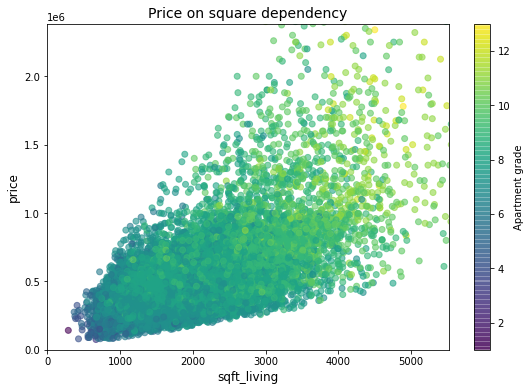

In [15]:
# 1. Define the size of the figure
plt.figure(figsize=(9, 6))
# 2. Plot 
plt.scatter(df.sqft_living, df.price, alpha=0.6,
            c=df.grade, cmap='viridis')
# 3. Set labels for each axis
plt.xlabel(xlabel='sqft_living', fontsize=12)
plt.ylabel(ylabel='price', fontsize=12)
# 4. Set title of the figure
plt.title(label='Price on square dependency', fontsize=14)
# 5. Display mapping from scalar values to colors
plt.colorbar(label='Apartment grade')
# 6. Limits for each axis
plt.xlim((0, np.percentile(df.sqft_living, 99.5)))
plt.ylim((0, np.percentile(df.price, 99.5)))
# 7. Display the figure
plt.show()

In [46]:
df.columns[3:]
numeric_features = df.select_dtypes('number').columns
numeric_features = numeric_features[2:] # drop target and dates
numeric_features[:-2]
df.price.max()

7700000.0

Now it's your turn to display several scatter plots in one figure using [`matplotlib.pyplot.subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html).

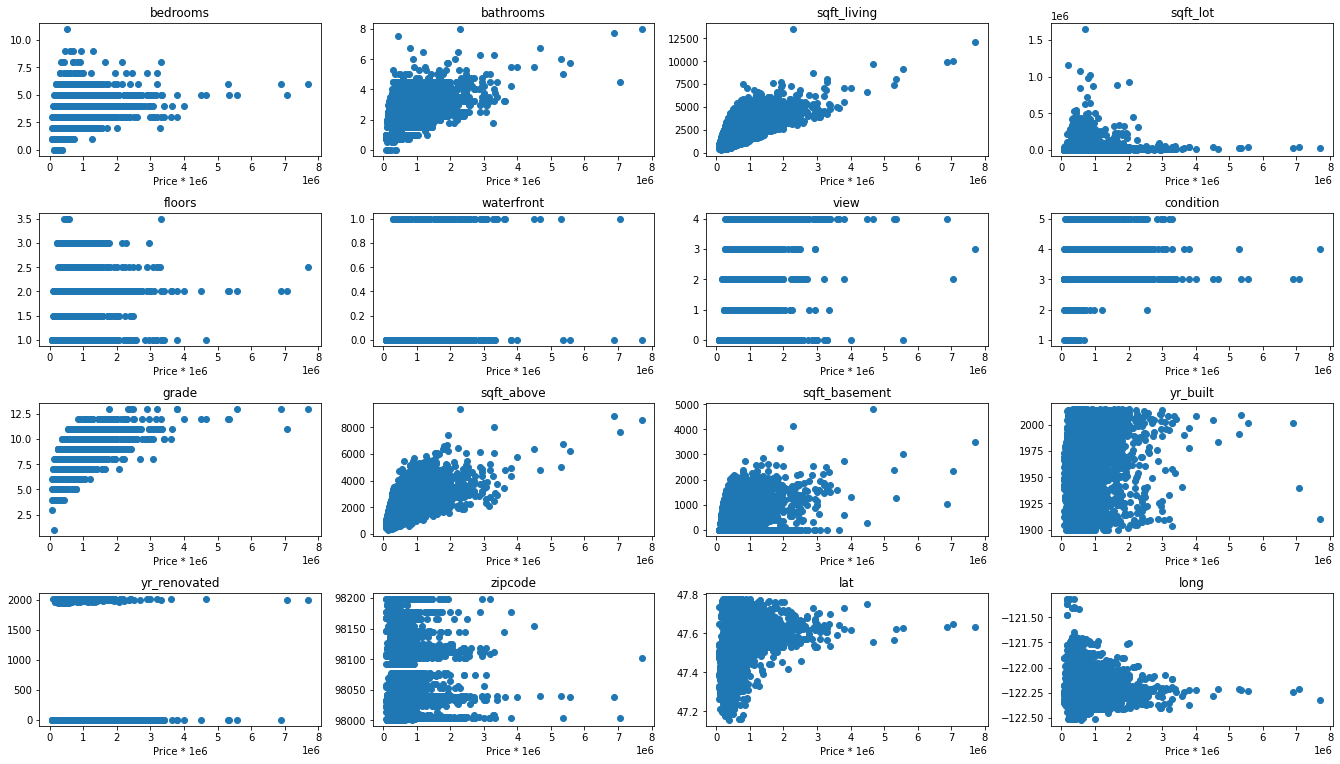

In [48]:
from math import ceil

ncols = 4
nrows = ceil(len(numeric_features) / ncols) - 1
fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
idx = [(j, i) for j in range(ncols) for i in range(nrows)]

for id, col in zip(idx, numeric_features[:-2]):
    data = df[col]
    axs[id].scatter(df.price, data)
    axs[id].set_title(col)
    axs[id].set_xlabel('Price * 1e6')
plt.show()

## 3.3 Histograms

### 3.3.1

Using [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) visualize distribution of values of some features. Display them in one figure as you've done in task 3.2.

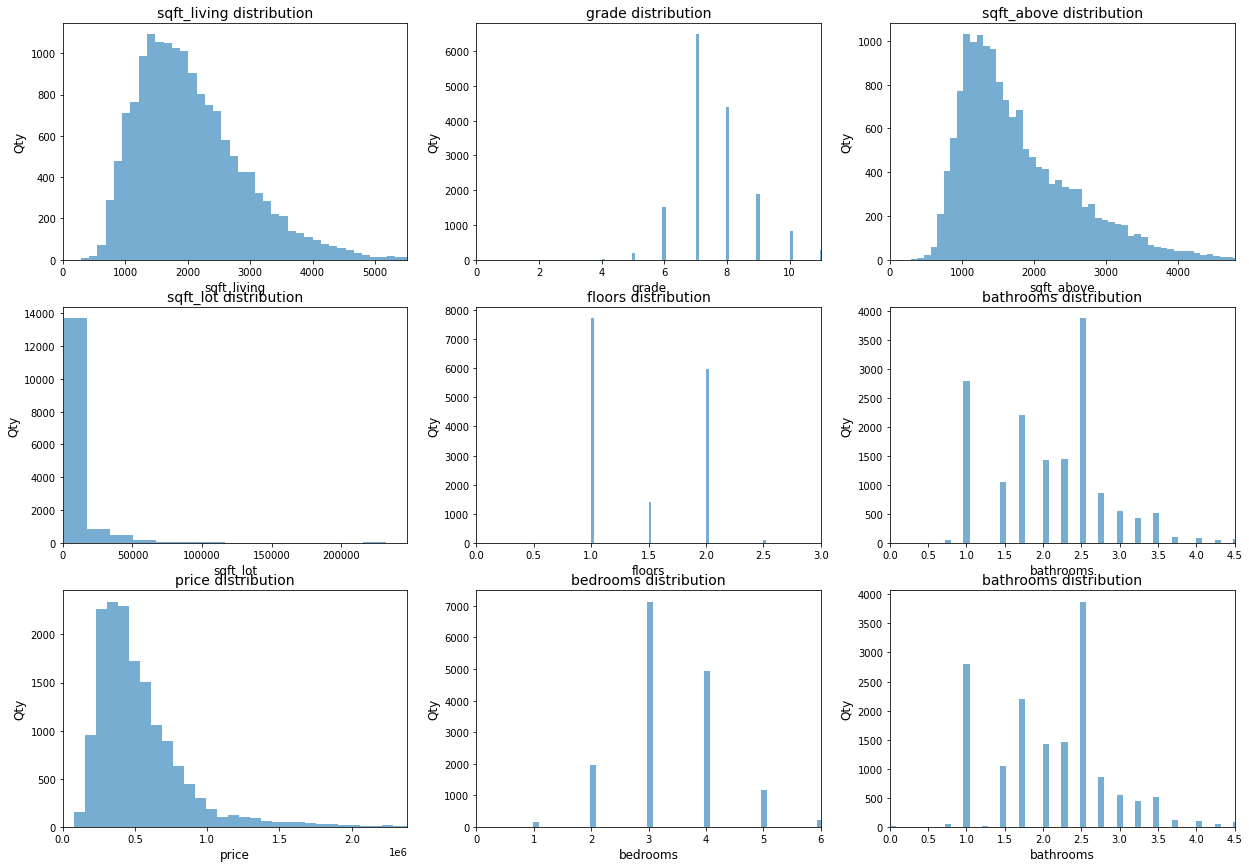

In [49]:
features_for_histogramm = ['sqft_living', 'grade', 'sqft_above', 'sqft_lot', 'floors', 'bathrooms', 'price', 'bedrooms', 'bathrooms']
n = len(features_for_histogramm)
columns = np.round(np.sqrt(n))
raws = np.round(np.sqrt(n)) + 1

plt.figure(figsize=(columns*7, raws*5))
for i, feature_name in enumerate(features_for_histogramm):
    ax = plt.subplot(raws, columns, i+1)
    plt.hist(df[feature_name], alpha=0.6, bins=100)
    # 3. Set labels for each axis
    plt.xlabel(xlabel=feature_name, fontsize=12)
    plt.ylabel(ylabel='Qty', fontsize=12)
    # 4. Set title of the figure
    plt.title(f'{feature_name} distribution', fontsize=14)
    # 6. Limits for each axis
    plt.xlim((0, np.percentile(df[feature_name], 99.5)))
plt.show()

### 3.3.2

Using [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) compare distribution of prices for apartments with different `waterfront` parameter values. Display them in one plot.

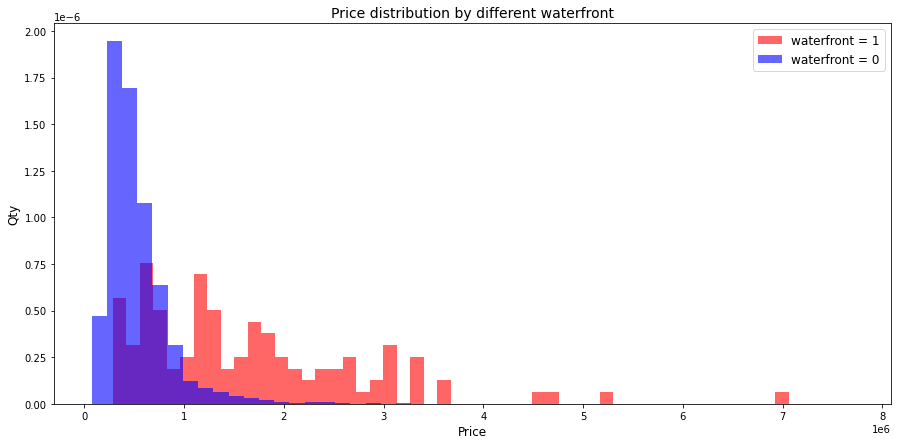

In [50]:
plt.figure(figsize=(15, 7))
plt.hist(df[df.waterfront == 1].price, density=True, alpha=0.6, bins=50, color='r', label='waterfront = 1')
plt.hist(df[df.waterfront == 0].price, density=True, alpha=0.6, bins=50, color='blue', label='waterfront = 0')
plt.legend(fontsize=12)
# 3. Set labels for each axis
plt.xlabel(xlabel='Price', fontsize=12)
plt.ylabel(ylabel='Qty', fontsize=12)
# 4. Set title of the figure
plt.title(f'Price distribution by different waterfront', fontsize=14)
plt.show()

## 3.4 Linear plots

### 3.4.1

Using [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) visualize average apartment price dynamics by date. Be careful when sorting average price values by date.

### 3.4.2

Using [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) visualize average apartment price dynamics by date with segregation by `grade` value. Divide by `grade` values in the next way:
* $1 \leq grade \leq 4$ – `'low quality'`
* $5 \leq grade \leq 10$ – `'average quality'`
* $11 \leq grade \leq 13$ – `'high quality'` 

Display three linear plots in one figure. Don't forget to display [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

## 3.5 Heatmaps

Using [`seaborn.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) and [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) display a plot that may help to fing most correlated features.

In [53]:
import seaborn as sns

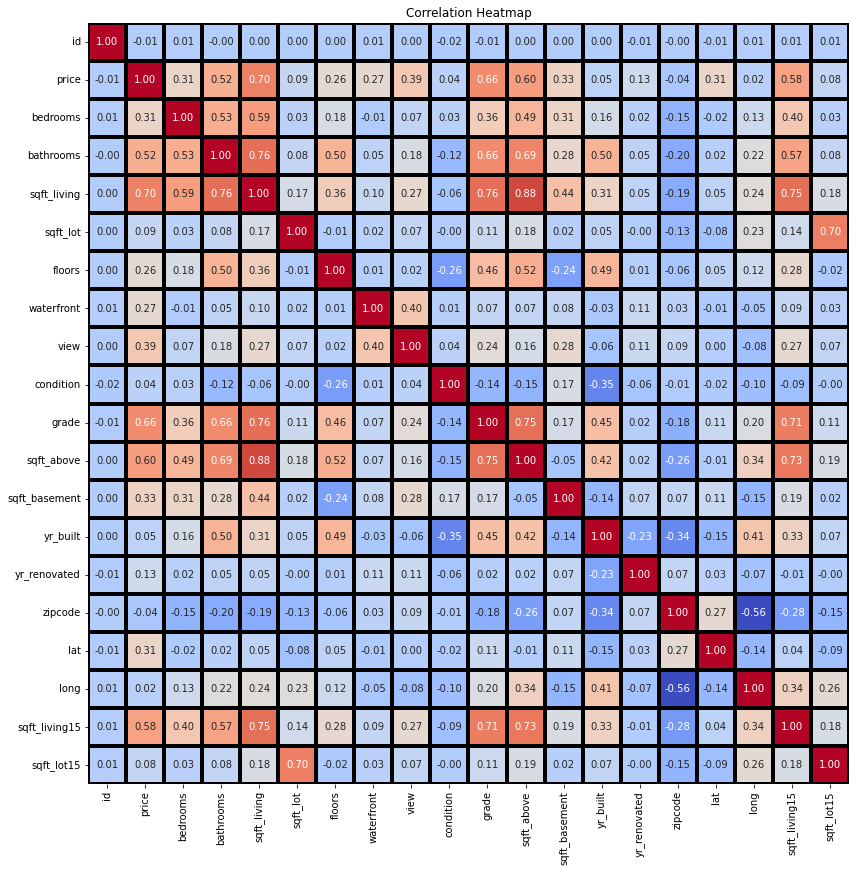

In [57]:

corr = df.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True,
            cmap= 'coolwarm',
            linewidths=3,
            fmt='.2f',
            linecolor='black',
            square=True,
            cbar=False)
plt.title('Correlation Heatmap');

## 3.6 Boxplots

Using [`seaborn.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) plot price boxplots for each month.

**Hint:** Is it suitable to use `matplotlib.pyplot.ylim` here?

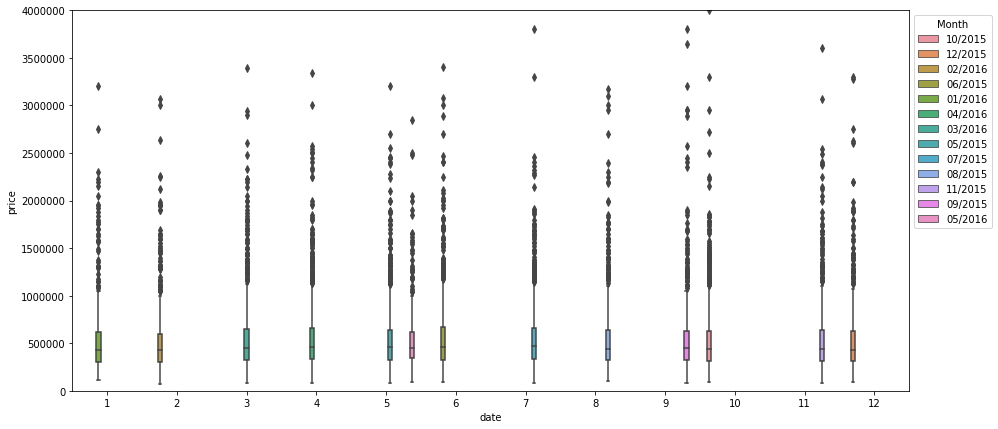

In [60]:
import datetime

fig, ax = plt.subplots(figsize=(15, 7))
plt.ylim([0, 4e6])
sns.boxplot(x=df.date.dt.month, y=df.price, hue=df.date.dt.strftime('%m/%Y'), ax=ax)
ax.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## 3.7 Maps

In this task you're supposed to visualize apartments location on a map. Using [plotly.express.scatter_mapbox](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) depict the locations – you're supposed to get a plot which shows how apartment price changes from region to region.

You may attention to next parameters:
* `size`
* `color`
* `opacity`
* `zoom`
* `size_max`

**Hint:** In case you get an uninformative plot, try to get rid of outliers.

In [63]:
import plotly.express as px

In [74]:
norm_price = (df.price - df.price.mean()) / df.price.std(ddof=1)
norm_price=(df.price-df.price.min())/(df.price.max()-df.price.min())

0.0

In [80]:
fig = px.scatter_mapbox(df.price, df.lat, df.long, color=df.price, opacity=norm_price)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

